<span style="color:green">
    
> # Split octonionic spinors vectors and trilinear form
>In this notebook correspondence is established between $\mathcal{C}\ell_{4,4}(\mathbb{R})$ clifford algebraic and $\mathbb{O}^\prime$ split octonionic representations of spinors, vectors and their transformation groups $SO(4,4)$ and $Spin(4,4)$.

</span>

In [1]:
import sympy as syp
from IPython.display import Math as displayMath
from SplitOct import *
syp.init_printing(use_unicode=True)
import numpy as np

import sys
print('python     :', sys.version)
print('sympy      :', syp.__version__)
print('SplitOct   :', version())
print('numpy      :', np.__version__)
print()
!jupyter --version

python     : 3.11.5 (main, Sep  2 2023, 14:16:33) [GCC 13.2.1 20230801]
sympy      : 1.12
SplitOct   : 0.16
numpy      : 1.26.0

Selected Jupyter core packages...
IPython          : 8.15.0
ipykernel        : 6.25.2
ipywidgets       : 8.1.1
jupyter_client   : 8.3.1
jupyter_core     : 5.3.1
jupyter_server   : 2.7.3
jupyterlab       : 4.0.6
nbclient         : 0.8.0
nbconvert        : 7.8.0
nbformat         : 5.9.2
notebook         : 7.0.4
qtconsole        : not installed
traitlets        : 5.10.0


In [2]:
# useful functions and shortcuts
dispmath = lambda x: display(displayMath(x))
def tex(inputobj):
    if type(inputobj) == SplitOctonion:
        return inputobj.__repr__()
    else:
        return syp.latex(inputobj)
half = syp.Rational(1,2)
i = syp.I
def sypHermConj(x):
    return syp.transpose(syp.conjugate(x))

<span style="color:green">

__________________________________________________________

    
>## Matrix representation of $ \mathcal{C}\ell_{4,4}\left(\mathbb{R}\right) $
> $ \mathcal{C}\ell_{8,0}\left(\mathbb{R}\right) $ is isomorphic to $\mathrm{Mat}_{16\times 16}(\mathbb{R})$ and is generated by 

\begin{equation} A_{\mu}=\left(\begin{array}{cc}
0 & \alpha_{\mu}\\
\alpha_{\mu}^{\dagger} & 0
\end{array}\right) \end{equation}

> as described by Gamba in [1]. Matrix representation of $ \mathcal{C}\ell_{4,4}\left(\mathbb{R}\right) $ Clifford algebra element $e_{ij\ldots k}$ will be denotes as $\Gamma_{i}\Gamma_{j}\ldots\Gamma_{k}$. Generators are obtained as

\begin{equation} \begin{aligned}\Gamma_{m} & =A_{m}~,\qquad\left(m=0,1,2,3\right)\\
\Gamma_{4+m} & =-iA_{4+m}~.
\end{aligned} \end{equation}

</span>

In [3]:
def _compute_gammas():
    α = 8 * [ None]
    
    n = [0, 1, 2, 3]
    # n = [0, 1, 3, 2]
    # n = [0, 2, 1, 3]
    # n = [0, 2, 3, 1]
    # n = [0, 3, 1, 2]
    # n = [0, 3, 2, 1]
    # n = [1, 0, 2, 3]
    # n = [1, 0, 3, 2]
    # n = [1, 2, 0, 3]
    # n = [1, 2, 3, 0]
    # n = [1, 3, 0, 2]
    # n = [1, 3, 2, 0]
    # n = [2, 0, 1, 3]
    # n = [2, 0, 3, 1]
    # n = [2, 1, 0, 3]
    # n = [2, 1, 3, 0]
    # n = [2, 3, 0, 1]
    # n = [2, 3, 1, 0]
    # n = [3, 0, 1, 2]
    # n = [3, 0, 2, 1]
    # n = [3, 1, 0, 2]
    # n = [3, 1, 2, 0]
    # n = [3, 2, 0, 1]
    # n = [3, 2, 1, 0]
    
    α[n[0]] = syp.Matrix([
        [-1,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  1,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  1,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  1,  0,  0,  0,  0],
        [ 0,  0,  0,  0, -1,  0,  0,  0],
        [ 0,  0,  0,  0,  0, -1,  0,  0],
        [ 0,  0,  0,  0,  0,  0, -1,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  1]])
    
    α[n[1]] = syp.Matrix([
        [ 0,  1,  0,  0,  0,  0,  0,  0],
        [ 1,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0, -1,  0,  0,  0],
        [ 0,  0,  0,  0,  0, -1,  0,  0],
        [ 0,  0, -1,  0,  0,  0,  0,  0],
        [ 0,  0,  0, -1,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  1],
        [ 0,  0,  0,  0,  0,  0,  1,  0]])
    
    α[n[2]] = syp.Matrix([
        [ 0,  0,  1,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  1,  0,  0,  0],
        [ 1,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0, -1,  0],
        [ 0,  1,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0, -1],
        [ 0,  0,  0, -1,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0, -1,  0,  0]])
    
    α[n[3]] = syp.Matrix([
        [ 0,  0,  0,  1,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  1,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  1,  0],
        [ 1,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  1],
        [ 0,  1,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  1,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  1,  0,  0,  0]])
    
    α[4 + n[0]] = syp.Matrix([
        [ i,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  i,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  i,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  i,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  i,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  i,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  i,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  i]])
    
    α[4 + n[1]] = syp.Matrix([
        [ 0, -i,  0,  0,  0,  0,  0,  0],
        [ i,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  i,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  i,  0,  0],
        [ 0,  0, -i,  0,  0,  0,  0,  0],
        [ 0,  0,  0, -i,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0, -i],
        [ 0,  0,  0,  0,  0,  0,  i,  0]])
    
    α[4 + n[2]] = syp.Matrix([
        [ 0,  0, -i,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0, -i,  0,  0,  0],
        [ i,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  i,  0],
        [ 0,  i,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  i],
        [ 0,  0,  0, -i,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0, -i,  0,  0]])
    
    α[4 + n[3]] = syp.Matrix([
        [ 0,  0,  0, -i,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0, -i,  0,  0],
        [ 0,  0,  0,  0,  0,  0, -i,  0],
        [ i,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0, -i],
        [ 0,  i,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  i,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  i,  0,  0,  0]])
    
    Γ = 8*[None]
    for n in range(0, 4):
        Γ[n] = syp.zeros(16, 16)
        Γ[n][:8,8:] = α[n]
        Γ[n][8:,:8] = α[n].transpose()
    for n in range(4, 8):
        Γ[n] = syp.zeros(16, 16)
        Γ[n][:8,8:] = (-i)*α[n]
        Γ[n][8:,:8] = -(-i)*α[n].transpose()
    return Γ

Γ = _compute_gammas()
g_metric = syp.diag(1,1,1,1,-1,-1,-1,-1)

def check_clifford_algebra(g_metric, Γ):
    N = len(Γ)
    matrix_dim = Γ[0].shape[0]
    identity_matrix = syp.eye(matrix_dim)
    correct = True
    for m in range(N):
        for n in range(N):
            LHS = Γ[m]@Γ[n] + Γ[n]@Γ[m]
            RHS = 2 * g_metric[m,n] * identity_matrix
            if LHS != RHS:
                correct = False
                print(f'Problem in (m,n)=({m},{n}).')
    if correct: print('Clifford algebra relations are satisfied for the provided metric.')

check_clifford_algebra(g_metric, Γ)

def _cliff_alg_labeling():
    e = {}
    e['eye'] = syp.eye(16,16)
    for n1 in range(8):
        e[str(n1)] = \
            Γ[n1]
        for n2 in range(n1 + 1,8):
            e[str(n1) + str(n2)] = \
                Γ[n1] @ Γ[n2]
            for n3 in range(n2 + 1,8):
                e[str(n1) + str(n2) + str(n3)] = \
                    Γ[n1] @ Γ[n2] @ Γ[n3]
                for n4 in range(n3 + 1,8):
                    e[str(n1) + str(n2) + str(n3) + str(n4)] = \
                        Γ[n1] @ Γ[n2] @ Γ[n3] @ Γ[n4]
                    for n5 in range(n4 + 1,8):
                        e[str(n1) + str(n2) + str(n3) + str(n4) + str(n5)] = \
                            Γ[n1] @ Γ[n2] @ Γ[n3] @ Γ[n4] @ Γ[n5]
                        for n6 in range(n5 + 1,8):
                            e[str(n1) + str(n2) + str(n3) + str(n4) + str(n5) + str(n6)] = \
                                Γ[n1] @ Γ[n2] @ Γ[n3] @ Γ[n4] @ Γ[n5] @ Γ[n6]
                            for n7 in range(n6 + 1,8):
                                e[str(n1) + str(n2) + str(n3) + str(n4) + str(n5) + str(n6) + str(n7)] = \
                                    Γ[n1] @ Γ[n2] @ Γ[n3] @ Γ[n4] @ Γ[n5] @ Γ[n6] @ Γ[n7]
    e['01234567'] = Γ[0] @ Γ[1] @ Γ[2] @ Γ[3] @ Γ[4] @ Γ[5] @ Γ[6] @ Γ[7]
    return e
e = _cliff_alg_labeling()

Clifford algebra relations are satisfied for the provided metric.


<span style="color:green">

> ## Vectors in (4+4)-space

\begin{equation} \displaystyle x=\sum_{\beta=0}^{7}x_{\beta}\Gamma_{\beta} \end{equation}

\begin{equation} x^{2}=x_{0}^{2}+x_{1}^{2}+x_{2}^{2}+x_{3}^{2}-x_{4}^{2}-x_{5}^{2}-x_{6}^{2}-x_{7}^{2} \end{equation}

</span>

In [4]:
x = 8*[None]
x[0], x[1], x[2], x[3] = syp.symbols('x_0 x_1 x_2 x_3', real=True)
x[4], x[5], x[6], x[7] = syp.symbols('x_4 x_5 x_6 x_7', real=True)

def _create_x_mat():
    x_mat = syp.zeros(16,16)
    for n in range(8):
        x_mat = x_mat + x[n] * Γ[n]
    return x_mat
x_mat = _create_x_mat()

def _check_x_mat_squared():
    x_mat_squared = syp.matrices.dense.MutableDenseMatrix(syp.expand(x_mat @ x_mat))
    
    if x_mat_squared.is_diagonal():
        # dispmath(r'x^2 \text{ is diagonal.}')
        dispmath(r'x^2 \text{ is diagonal.}')
        if x_mat_squared / x_mat_squared[0,0] == syp.eye(16):
            dispmath(r'x^2 \text{ is identity matrix times: }' + tex(x_mat_squared[0,0]))
        else:
            dispmath(r'\text{diagonal elements of } x^2 \text{ are:}')
            for n in range(16):
                x_mat_squared[n,n]
    else:
        dispmath(r'x^2 \text{ is not diagonal.}')
        display(x_mat_squared)

_check_x_mat_squared()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<span style="color:green">

> ## $B$ matrix

>$ B $ matrix has a property:

\begin{equation} x^T = B x B $ \end{equation}

</span>

In [5]:
# Following code searches for such B matrix with the property specified above
def _find_B_matrix():
    transposed = x_mat.transpose()
    for key in e:
        M = e[key] @ x_mat @ e[key]
        if M == transposed:
            dispstr = r"\text{It's is found to be } B = "
            for c in key:
                dispstr += rf'\Gamma_{c}'
            dispmath(dispstr)
            return key
B = e[_find_B_matrix()]
dispmath(r'\text{In a matrix form:}')
dispmath(rf'B = ' + tex(B))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<span style="color:green">

>## Spinors in (4+4)-space and triality

>Finding spinors is a straightforward procedure. One must find identify idempotent in $\mathcal{C}\ell_{4,4}(\mathbb{R})$, i.e. an element $ f $ such that $f^2 = f$ and then act on it with general element of $\mathcal{C}\ell_{4,4}(\mathbb{R})$ from the left to get a minimal left ideal, which is same as spinor [2].

>Below we are looking for idempotent of the form

\begin{equation} f=\left(\begin{array}{cc}
1 & 0\\
0 & 0_{15\times15}
\end{array}\right) \end{equation}

</span>

In [6]:
def _find_diagonals():
    diag_keys = []
    Zero = syp.zeros(16, 16)
    for key in e:
        if e[key].is_diagonal():
            diag_keys.append(key)
    return diag_keys
diag_keys = _find_diagonals()

def _disp_diags():
    def _take_out_diagonal(M):
        matrix_dim = M.shape[0]
        L = []
        for n in range(matrix_dim):
            L.append(M[n,n])
        return L
    print('\tDiagonals of diagonal basis matrices plus one and divided by 2:')
    for (n, ind) in enumerate(diag_keys):
        print(f'{n:>2}: ', end='')
        for entry in _take_out_diagonal(e[ind]):
            entry = (entry + 1)/2
            print(f'{int(entry):>3}, ', end='')
        print(f' (e_{ind})')

_disp_diags()

	Diagonals of diagonal basis matrices plus one and divided by 2:
 0:   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,  (e_eye)
 1:   0,   0,   0,   1,   0,   1,   1,   1,   1,   1,   1,   0,   1,   0,   0,   0,  (e_012456)
 2:   0,   0,   1,   0,   1,   0,   1,   1,   1,   1,   0,   1,   0,   1,   0,   0,  (e_013457)
 3:   0,   0,   1,   1,   1,   1,   0,   0,   1,   1,   0,   0,   0,   0,   1,   1,  (e_0145)
 4:   0,   1,   0,   0,   1,   1,   0,   1,   1,   0,   1,   1,   0,   0,   1,   0,  (e_023467)
 5:   0,   1,   0,   1,   1,   0,   1,   0,   1,   0,   1,   0,   0,   1,   0,   1,  (e_0246)
 6:   0,   1,   1,   0,   0,   1,   1,   0,   1,   0,   0,   1,   1,   0,   0,   1,  (e_0347)
 7:   1,   0,   0,   0,   1,   1,   1,   0,   0,   1,   1,   1,   0,   0,   0,   1,  (e_04)
 8:   0,   1,   1,   1,   0,   0,   0,   1,   0,   1,   1,   1,   0,   0,   0,   1,  (e_123567)
 9:   0,   1,   1,   0,   0,   1,   1,   0,   0,   1,   1,   0,   0,   1,   1,   0, 

<span style="color:green">

>The solution is found manually to be  $ f = \frac{1}{16} \left(1 + e_{01234567}\right) \left(1 + e_{37}\right) \left(1 + e_{26}\right) \left(1 + e_{15} \right)$

</span>

In [7]:
f_idempotent = syp.Rational(1,16) * (e['eye'] + e['01234567']) @ (e['eye'] + e['37']) @ (e['eye'] + e['26']) @ (e['eye'] + e['15'])
dispmath(r'f = ' + tex(f_idempotent))

<IPython.core.display.Math object>

<span style="color:green">

> Additionally another procedure is identified of obtaining $f$

\begin{equation} T_{0} = 1 \end{equation}

\begin{equation} T_{n+1} = \frac{1}{2} \left( T_{n} + \Gamma_{n} T_{n}\Gamma_{4 + n} \right) \end{equation}

\begin{equation} f = T_{4} \end{equation}

</span>

In [8]:
# syp.Rational(1,16) * (e['eye'] + e['01234567']) @ (e['eye'] + e['37']) @ (e['eye'] + e['26']) @ (e['eye'] + e['15'])

def _idempotent():
    temp_0 = e['eye']
    temp_1 = syp.Rational(1,2) * (temp_0 + e['0'] @ temp_0 @ e['4'])
    temp_2 = syp.Rational(1,2) * (temp_1 + e['1'] @ temp_1 @ e['5'])
    temp_3 = syp.Rational(1,2) * (temp_2 + e['2'] @ temp_2 @ e['6'])
    temp_4 = syp.Rational(1,2) * (temp_3 + e['3'] @ temp_3 @ e['7'])
    return temp_4

f_idempotent = _idempotent()
dispmath(r'f = ' + tex(f_idempotent))

<IPython.core.display.Math object>

<span style="color:green">

>Since acting from the left on $f$ by any matrix results in a matrix that has only the first column filled, we can identify spinors with 16 dimensional column vectors. Further more transformation rules conserve first 8 component and last 8 component subspaces independently [1] which are called chiral parts of the spinor. We denote them as $\phi$ and $\psi$.

</span>

In [9]:
ϕ, ψ = 8*[None], 8*[None]

ϕ[0], ϕ[1], ϕ[2], ϕ[3] = syp.symbols('phi_0 phi_1 phi_2 phi_3', real=True)
ϕ[4], ϕ[5], ϕ[6], ϕ[7] = syp.symbols('phi_4 phi_5 phi_6 phi_7', real=True)

ψ[0], ψ[1], ψ[2], ψ[3] = syp.symbols('psi_0 psi_1 psi_2 psi_3', real=True)
ψ[4], ψ[5], ψ[6], ψ[7] = syp.symbols('psi_4 psi_5 psi_6 psi_7', real=True)

ϕ_mat = syp.zeros(16,1)
ψ_mat = syp.zeros(16,1)

ϕ_mat[:8,0] = syp.Matrix(ϕ)
ψ_mat[8:,0] = syp.Matrix(ψ)
η_mat = ϕ_mat + ψ_mat
dispmath(r'\phi=' + tex(ϕ_mat) + r',\quad\psi=' + tex(ψ_mat) + r',\quad \eta = \phi + \psi = ' + tex(η_mat))

def _quadratic_forms():
    dispmath(r'\text{Quadratic forms on spinors:}')
    ϕBϕ = (syp.transpose(ϕ_mat) @ B @ ϕ_mat) [0]/2
    dispmath(r'\frac{1}{2}\phi^T B \phi = ' + tex(ϕBϕ))
    
    ψBψ = (syp.transpose(ψ_mat) @ B @ ψ_mat) [0]/2
    dispmath(r'\frac{1}{2}\psi^T B \psi = ' + tex(ψBψ))
    
    ηBη = (syp.transpose(η_mat) @ B @ η_mat) [0]/2
    dispmath(r'\frac{1}{2}\eta^T B \eta = \frac{1}{2}\phi^T B \phi +  \frac{1}{2}\psi^T B \psi = ' + tex(ηBη))
_quadratic_forms()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<span style="color:green">

>## Invariant trilinear form

>Both spinor and vector quaratic forms can be chacked to be invariant under orthogonal $Spin(4,4)$ and $SO(4,4)$ transformations. But there is another invariant quantity obtained by trilinear form

</span>

In [10]:
F_mat = syp.expand( (syp.transpose(ϕ_mat) @ B @ x_mat @ ψ_mat)[0] )
FT_mat = syp.expand( (syp.transpose(ψ_mat) @ B @ x_mat @ ϕ_mat)[0] )
Fη_mat = syp.expand( (syp.transpose(η_mat) @ B @ x_mat @ η_mat)[0] )/2

dispmath(r'\begin{aligned}\phi^T B x \psi & =\\ &' + tex(F_mat) + '\end{aligned}')

dispmath(r'\phi^T B x \psi - \psi^T B x \phi = ' + tex(syp.simplify(F_mat - FT_mat)))

dispmath(r'\phi^T B x \psi - \frac{1}{2}\eta^T B x \eta = ' + tex(F_mat - Fη_mat))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<span style="color:green">

>## Split octonionic vectors, spinors and trilinear form

</span>

In [11]:
x_oct = SplitOctonion(x)
ϕ_oct = SplitOctonion(ϕ)
ψ_oct = SplitOctonion(ψ)

def _disp_quadratic_forms():
    phiphi = (ϕ_oct.conj() * ϕ_oct).real()
    xx = (x_oct.conj() * x_oct).real()
    psipsi = (ψ_oct.conj() * ψ_oct).real()
    dispmath(r'\text{Split octonionic quadratic forms:}')
    dispmath(r'\overline{\phi}\phi=' + tex(phiphi) )
    dispmath(r'\overline{x}x=' + tex(xx))
    dispmath(r'\overline{\psi}\psi=' + tex(psipsi))

_disp_quadratic_forms()
print()

F_oct = syp.expand( ϕ_oct.conj().dot(x_oct * ψ_oct) )
dispmath(r'\text{Split octonionic trilinear form:}')
dispmath(r'\mathcal{F}\left(\phi,x,\psi\right) = ' + tex(F_oct))
print()

def _latex_to_func():
    string_func = 'def F_oct_func(ϕ, x, ψ):\n    return ' + syp.latex(F_oct)\
        .replace('\\phi', 'ϕ')\
        .replace('\\psi', 'ψ')\
        .replace('_{', '[')\
        .replace('}', ']')\
        .replace('] ψ', ']*ψ')\
        .replace('] x', ']*x')
    dispmath(r'\text{Trilinear form as a python function}')
    print(string_func)
    return string_func
exec(_latex_to_func())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

def F_oct_func(ϕ, x, ψ):
    return ϕ[0]*ψ[0]*x[0] - ϕ[0]*ψ[1]*x[1] - ϕ[0]*ψ[2]*x[2] - ϕ[0]*ψ[3]*x[3] + ϕ[0]*ψ[4]*x[4] + ϕ[0]*ψ[5]*x[5] + ϕ[0]*ψ[6]*x[6] + ϕ[0]*ψ[7]*x[7] - ϕ[1]*ψ[0]*x[1] - ϕ[1]*ψ[1]*x[0] + ϕ[1]*ψ[2]*x[3] - ϕ[1]*ψ[3]*x[2] - ϕ[1]*ψ[4]*x[5] + ϕ[1]*ψ[5]*x[4] + ϕ[1]*ψ[6]*x[7] - ϕ[1]*ψ[7]*x[6] - ϕ[2]*ψ[0]*x[2] - ϕ[2]*ψ[1]*x[3] - ϕ[2]*ψ[2]*x[0] + ϕ[2]*ψ[3]*x[1] - ϕ[2]*ψ[4]*x[6] - ϕ[2]*ψ[5]*x[7] + ϕ[2]*ψ[6]*x[4] + ϕ[2]*ψ[7]*x[5] - ϕ[3]*ψ[0]*x[3] + ϕ[3]*ψ[1]*x[2] - ϕ[3]*ψ[2]*x[1] - ϕ[3]*ψ[3]*x[0] - ϕ[3]*ψ[4]*x[7] + ϕ[3]*ψ[5]*x[6] - ϕ[3]*ψ[6]*x[5] + ϕ[3]*ψ[7]*x[4] + ϕ[4]*ψ[0]*x[4] + ϕ[4]*ψ[1]*x[5] + ϕ[4]*ψ[2]*x[6] + ϕ[4]*ψ[3]*x[7] + ϕ[4]*ψ[4]*x[0] - ϕ[4]*ψ[5]*x[1] - ϕ[4]*ψ[6]*x[2] - ϕ[4]*ψ[7]*x[3] + ϕ[5]*ψ[0]*x[5] - ϕ[5]*ψ[1]*x[4] + ϕ[5]*ψ[2]*x[7] - ϕ[5]*ψ[3]*x[6] + ϕ[5]*ψ[4]*x[1] + ϕ[5]*ψ[5]*x[0] + ϕ[5]*ψ[6]*x[3] - ϕ[5]*ψ[7]*x[2] + ϕ[6]*ψ[0]*x[6] - ϕ[6]*ψ[1]*x[7] - ϕ[6]*ψ[2]*x[4] + ϕ[6]*ψ[3]*x[5] + ϕ[6]*ψ[4]*x[2] - ϕ[6]*ψ[5]*x[3] + ϕ[6]*ψ[6]*x[0] + ϕ[6]*ψ[7]*x[1] + ϕ[7]*ψ[0]*x[

<span style="color:green">
    
>We want to establish correspondence between split octonionic and clifford algebraic representations. The problem is that in matrix representation quadratic form of spinors is not same as in split octonions. For that we are looking for a new basis for spinors. For that reason we use gradient descent algorithm to find spinor basis change matrix $ W $ such that in the new basis the following two conditions hold

\begin{equation} \phi^{T}B\phi=\left(\phi_{n}^{2}-\phi_{4+n}^{2}\right) \end{equation}

\begin{equation} \psi^{T}B\psi=\sum_{n=0}^{3}\left(\psi_{n}^{2}-\psi_{4+n}^{2}\right) \end{equation}

>and also $\mathcal{F}(\phi,x,\psi) = (\phi + \psi)^T B x (\phi + \psi) $ is consistent with split octonionic trilinear form $ \mathcal{F} $.

>Targets of gradient descent are:

\begin{equation} \tau_{1}=\sum_{n=0}^{3}\left(\phi_{n}^{2}-\phi_{4+n}^{2}+\psi_{n}^{2}-\psi_{4+n}^{2}\right) \end{equation}

\begin{equation} \tau_{2}=\mathcal{F}_{\text{oct}}\left(\phi,x,\psi \right) \end{equation}

> and const (error) functions are:

\begin{equation} E_{1}=\frac{1}{4}\Delta_{1}^{2}  \end{equation}

\begin{equation} E_{2}=\frac{1}{4}\Delta_{2}^{2} \end{equation}

> where

\begin{equation} \Delta_{1}=\left(W\eta\right)^{T}B\left(W\eta\right)-\tau_{1} \end{equation}

\begin{equation} \Delta_{2}=\left(W\eta\right)^{T}Bx\left(W\eta\right)-\tau_{2} \end{equation}

\begin{equation} \eta = \phi + \psi \end{equation}

> Gradients:

\begin{equation} \frac{\partial E_{1}}{\partial W}=\Delta_{1}BW\eta\eta^{T} \end{equation}

\begin{equation} \frac{\partial E_{2}}{\partial W}=\Delta_{2}\left(BxW\eta\eta^{T}\right) \end{equation}

> Update rule:

\begin{equation} W \mapsto W - \alpha \dfrac{\partial E}{\partial W} \end{equation}

> Derivative:

\begin{equation} \frac{\partial}{\partial W}\left(\left(W\phi\right)^{T}BX\left(W\psi\right)\right)=BXW\left(\psi\phi^{T}+\phi\psi^{T}\right) \end{equation}

</span>

In [12]:
def _gradient_descent():
    gamma = 8*[None]
    
    gamma[0] = np.array(Γ[0]).astype(np.float64)
    gamma[1] = np.array(Γ[1]).astype(np.float64)
    gamma[2] = np.array(Γ[2]).astype(np.float64)
    gamma[3] = np.array(Γ[3]).astype(np.float64)
    gamma[4] = np.array(Γ[4]).astype(np.float64)
    gamma[5] = np.array(Γ[5]).astype(np.float64)
    gamma[6] = np.array(Γ[6]).astype(np.float64)
    gamma[7] = np.array(Γ[7]).astype(np.float64)
    
    b = np.array(B).astype(np.float64)
    metric = np.array([[1, 1, 1, 1,-1,-1,-1,-1]]).transpose()
    
    sigma = 0.4
    W = np.random.normal(scale=sigma, size=(16,16))
    W[8:,:8] *= 0
    W[:8,8:] *= 0
    
    c_1 = 0.5
    c_2 = 1 - c_1
    
    Err_1 = []
    Err_2 = []
    Err_12 = []
    
    alpha_0 = 0.02
    batch_size = int(2e+3)
    
    Nabla_momentum = np.zeros((16,16))
    theta = 0.88
    
    def rate(j):
        return np.exp(-(j - 100)/600)*(np.tanh((j - 50)/20) + 1)/2
    
    for j in range(800):
        alpha = alpha_0 * rate(j)
        E_1 = []
        E_2 = []
        E_12 = []
        Nabla_cur = np.zeros((16,16))
        for m in range(batch_size):
            x = np.random.normal(scale=2, size=(8,1))
            Phi = np.random.normal(scale=2, size=(8,1))
            Psi = np.random.normal(scale=2, size=(8,1))

            F_oct = F_oct_func(Phi, x, Psi)
            eta = np.concatenate((Psi, Phi), axis=0)
            spinor_norm = np.sum(metric * Phi * Phi) + np.sum(metric * Psi * Psi)
            W_eta = W @ eta
            X = np.zeros((16,16))
            for n in range(8):
                X += x[n]*gamma[n]
            b_X = b @ X
            
            #================================================================
            # quadratic form condition
            Delta_1 = (np.transpose(W_eta) @ b @ W_eta)[0][0] - spinor_norm
            E_temp = Delta_1 * Delta_1 / 4
            E_1.append(E_temp)
            #================================================================
            # split octonionic triality condition
            Delta_2 = (np.transpose(W_eta) @ b_X @ W_eta)[0][0] / 2 - F_oct
            E_temp = Delta_2 * Delta_2 / 8
            E_2.append(E_temp)
            #================================================================

            E_12.append(c_1 * E_1[-1] + c_2 * E_2[-1])
            
            W_eta_etaT = (W @ eta) @ np.transpose(eta)
            Nabla_cur += c_1 * Delta_1 * \
                b @ W_eta_etaT
            
            Nabla_cur += c_2 * Delta_2 * \
                b_X @ W_eta_etaT
        Nabla_cur = Nabla_cur / batch_size
        Nabla_cur[8:,:8] *= 0
        Nabla_cur[:8,8:] *= 0

        Nabla_momentum = theta * Nabla_momentum + (1 - theta) * Nabla_cur
        W -= alpha * Nabla_momentum

        Err_1.append(np.mean(E_1))
        Err_2.append(np.mean(E_2))
        Err_12.append(np.mean(E_12))
        
        if Err_12[-1] < 0.002:
            break
        #print(Err_1[-1], Err_2[-1], Err_12[-1])
        if (j % 10 == 0):
            print(f'epoch: {j}, total error:', Err_12[-1])
    return W

def _W():
    W_ml = _gradient_descent()
    W0 = np.round(np.sqrt(2)*W_ml).tolist()
    W1 = np.array(W0, dtype=int)
    W = syp.Matrix(W1.tolist())
    dispmath(r'\text{Basis change matrix}')
    dispmath(r'W = '+ tex(W))
    return W

W = _W()
# W = syp.eye(16)

epoch: 0, total error: 890.8349371351749
epoch: 10, total error: 334.8090066990434
epoch: 20, total error: 301.2688151236846
epoch: 30, total error: 212.7509662316781
epoch: 40, total error: 37.23184417455998
epoch: 50, total error: 23.632429454862685
epoch: 60, total error: 16.172523848848908
epoch: 70, total error: 7.5547739171389825
epoch: 80, total error: 4.075585394752536
epoch: 90, total error: 2.0834998595655065
epoch: 100, total error: 0.8950336677745383
epoch: 110, total error: 0.4063650544483667
epoch: 120, total error: 0.15319117740818727
epoch: 130, total error: 0.08093600238401087
epoch: 140, total error: 0.04310821453383883
epoch: 150, total error: 0.020270884109643762
epoch: 160, total error: 0.008842556633167423
epoch: 170, total error: 0.003532573821909328


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [13]:
ϕ_mat, ψ_mat = syp.zeros(16,1), syp.zeros(16,1)

ϕ_mat[8:,:] = syp.Matrix(ϕ)
ψ_mat[:8,:] = syp.Matrix(ψ)

W_ϕ_mat = 1 / syp.sqrt(2) * W @ ϕ_mat
W_ψ_mat = 1 / syp.sqrt(2) * W @ ψ_mat
W_η_mat = W_ϕ_mat + W_ψ_mat


def _disp_basischanged_quadratic_forms():
    phiphi = syp.expand((W_ϕ_mat.transpose() @ B @ W_ϕ_mat)[0])
    psipsi = syp.expand((W_ψ_mat.transpose() @ B @ W_ψ_mat)[0])
    dispmath(r'\text{Quadratic forms in the new basis:}')
    dispmath(r'\phi^T B \phi=' + tex(phiphi))
    dispmath(r'\psi^T B \psi=' + tex(psipsi))
    
    eta = syp.expand(syp.sqrt(2) * W_η_mat)
    dispmath(r'\eta=\phi+\psi=' + tex(eta))

_disp_basischanged_quadratic_forms()

F_cliff = syp.expand((W_ψ_mat.transpose() @ B @ x_mat @ W_ϕ_mat)[0])
print()
dispmath(r'\psi^T B x \phi = ' + tex(F_cliff))

print()
dispmath(r'\text{Difference between split octonionic and } \mathcal{C}\ell_{4,4} \text{ matrix trilinear forms: }'
        + tex(syp.simplify(F_cliff - F_oct)) )
print('(should be zero)')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

(should be zero)


<span style="color:green">

>## Split octonionic $SO(4,4)$ and $Spin(4,4)$
>Checking if transformation laws

> - $\Phi^\prime = \left(\Phi u\right) \overline{\mathrm{T}}_{uv}$
> - $\mathrm{X}^\prime = \mathrm{T}_{uv}\left(u\mathrm{X}u\right) \mathrm{T}_{uv}$
> - $\Psi^\prime = \overline{\mathrm{T}}_{uv} \left(u \Phi \right)$

>indeed do generate $\mathbb{O}^\prime$ split octonionic representations of $SO(4,4)$ and $Spin(4,4)$ just as similar transformations for regular $\mathbb{O}$ octonions generate $SO(4,4)$ and $Spin(4,4)$ [3].

</span>

In [14]:
θ = syp.symbols('vartheta', real=True)

In [15]:
def _indexer(w):
    for n in range(8):
        L = 8*[0]
        L[n] = 1
        if w.x == L:
            return n
    return None

def _pseudo_orthogonal_transformations(u, v):
    u_idx = _indexer(u)
    v_idx = _indexer(v)
    if v_idx > u_idx:
        comp = f'{u_idx}{v_idx}'
        L_infinitesimal = syp.eye(16) + (θ/2)*e[comp]
        L_infinitesimal_inv = syp.eye(16) - (θ/2)*e[comp]
    elif v_idx < u_idx:
        comp = f'{v_idx}{u_idx}'
        L_infinitesimal = syp.eye(16) + (-θ/2)*e[comp]
        L_infinitesimal_inv = syp.eye(16) - (-θ/2)*e[comp]
    else:
        L_infinitesimal = syp.eye(16)
        L_infinitesimal_inv = syp.eye(16)
    
    def vector_changed_component(n):
        result = L_infinitesimal * (x[n]*Γ[n]) * L_infinitesimal_inv
        result = result.expand()
        result = result.subs(θ**2, 0)
        # display(result)
        result = (result - x[n]*Γ[n]) / (θ * x[n])
        Zero = syp.zeros(16)
        
        sign = 0
        idx = 0
        for m in range(8):
            if result == Γ[m]:
                sign = 1
                idx = m
                break
            elif result == -Γ[m]:
                sign = -1
                idx = m
                break
        return sign, idx
    
    W_η_mat_2 = syp.expand( (2 / syp.sqrt(2)) * W_η_mat )
    
    def spinor_change_component(n):
        ϕ_mat_one, ψ_mat_one = syp.zeros(16,1), syp.zeros(16,1)
        ϕ_mat_one[8 + n] = ϕ[n]
        ψ_mat_one[n] = ψ[n]
        
        ϕ_mat_one = W @ ϕ_mat_one
        ψ_mat_one = W @ ψ_mat_one
        
        η_mat_one = ϕ_mat_one + ψ_mat_one
        
        on_the_tangent = syp.expand( (L_infinitesimal - syp.eye(16)) @ η_mat_one)
        
        phi_indic = syp.Matrix( on_the_tangent[8:] ) / ( (ϕ[n]* θ) / 2 )
        # display(phi_indic)
        idxs = []
        for m in range(8):
            if phi_indic[m] != 0:
                idxs.append(m)
        if phi_indic[idxs[0]] == phi_indic[idxs[1]]:
            goesinto = W_η_mat_2[ 8 + idxs[0] ] + W_η_mat_2[ 8 + idxs[1] ]
        elif phi_indic[idxs[0]] == -phi_indic[idxs[1]]:
            goesinto = W_η_mat_2[ 8 + idxs[0] ] - W_η_mat_2[ 8 + idxs[1] ]
        else:
            raise ValueError('should be either 1 or -1')
        goesinto = goesinto / 2
        for m in range(8):
            if goesinto == ϕ[m]:
                phi_idx = m
                phi_sign = 1 if phi_indic[idxs[0]] == 1 else -1
                break
            elif goesinto == -ϕ[m]:
                phi_idx = m
                phi_sign = -1 if phi_indic[idxs[0]] == 1 else 1
                break
        
        psi_indic = syp.Matrix( on_the_tangent[:8] ) / ( (ψ[n]* θ) / 2 )
        # display(phi_indic)
        idxs = []
        for m in range(8):
            if psi_indic[m] != 0:
                idxs.append(m)
        if psi_indic[idxs[0]] == psi_indic[idxs[1]]:
            goesinto = W_η_mat_2[ idxs[0] ] + W_η_mat_2[ idxs[1] ]
        elif psi_indic[idxs[0]] == -psi_indic[idxs[1]]:
            goesinto = W_η_mat_2[ idxs[0] ] - W_η_mat_2[ idxs[1] ]
        else:
            raise ValueError('should be either 1 or -1')
        goesinto = goesinto / 2
        for m in range(8):
            if goesinto == ψ[m]:
                psi_idx = m
                psi_sign = 1 if psi_indic[idxs[0]] == 1 else -1
                break
            elif goesinto == -ψ[m]:
                psi_idx = m
                psi_sign = -1 if psi_indic[idxs[0]] == 1 else 1
                break
        
        return phi_sign, phi_idx, psi_sign, psi_idx
    
    phi_outvec = syp.zeros(8,1)
    x_outvec = syp.zeros(8,1)
    psi_outvec = syp.zeros(8,1)
    
    for n in range(8):
        x_sign, x_idx = vector_changed_component(n)
        phi_sign, phi_idx, psi_sign, psi_idx = spinor_change_component(n)
        
        x_outvec[n] = x[n]
        if x_sign: x_outvec[n] += x_sign * θ * x[x_idx]
        phi_outvec[n] += ϕ[n] + phi_sign*half*θ*ϕ[phi_idx]
        psi_outvec[n] += ψ[n] + psi_sign*half*θ*ψ[psi_idx]
        
    display([phi_outvec, x_outvec, psi_outvec])

In [16]:
def _pseudo_orthogonal_transformations_splitOct(u, v):
    def oct_as_vec(Omega):
        M = syp.Matrix([
            syp.trigsimp(syp.collect(Omega.real(), x[0])),
            syp.trigsimp(syp.collect(Omega.j1(), x[1])),
            syp.trigsimp(syp.collect(Omega.j2(), x[2])),
            syp.trigsimp(syp.collect(Omega.j3(), x[3])),
            syp.trigsimp(syp.collect(Omega.I(),  x[4])),
            syp.trigsimp(syp.collect(Omega.J1(), x[5])),
            syp.trigsimp(syp.collect(Omega.J2(), x[6])),
            syp.trigsimp(syp.collect(Omega.J3(), x[7]))])
        return M
    
    def T(u, v, angle):
        if u*u.conj() == v*v.conj():
            return u*syp.cos(angle/2) + v*syp.sin(angle/2)
        elif u*u.conj() == -v*v.conj():
            return u*syp.cosh(angle/2) + v*syp.sinh(angle/2)
        else:
            raise ValueError('u and v must be basis units with length 1')
    
    # u,v = o1, j1
    # u,v = j1, oI
    # u,v = J1, J2
    
    # Q_u = u * u.conj()
    u2 = u * u
    
    u_footprint = ( u * u.conj() - u * u ).real()
    spin_θ = (abs(u_footprint) - 1 ) * θ
    
    # ϕ_oct_new = Q_u * (ϕ_oct*u)*T(u, v, θ).conj()
    ϕ_oct_new = u2 * (ϕ_oct*u)*T(u, v, spin_θ)
    # ϕ_oct_new = u2 * (ϕ_oct*u)*T(u, v, θ)
    # ϕ_oct_new = Q_u * (ϕ_oct*u)*T(u, v, spin_θ).conj()
    # ϕ_oct_new = (ϕ_oct*u)*T_uv
    
    x_oct_new = T(u, v, θ)*(u*x_oct*u)*T(u, v, θ)
    
    # ψ_oct_new = Q_u * T(u, v, θ).conj()*(u*ψ_oct)
    ψ_oct_new = u2 * T(u, v, spin_θ)*(u*ψ_oct)
    # ψ_oct_new = u2 * T(u, v, θ)*(u*ψ_oct)
    # ψ_oct_new = Q_u * T(u, v, spin_θ).conj()*(u*ψ_oct)
    # ψ_oct_new = T_uv*(u*ψ_oct)
    
    display([oct_as_vec(ϕ_oct_new), oct_as_vec(x_oct_new), oct_as_vec(ψ_oct_new)])

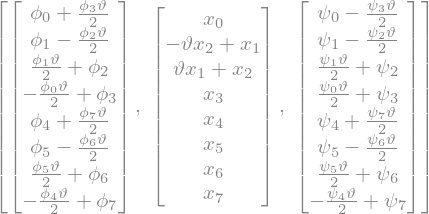

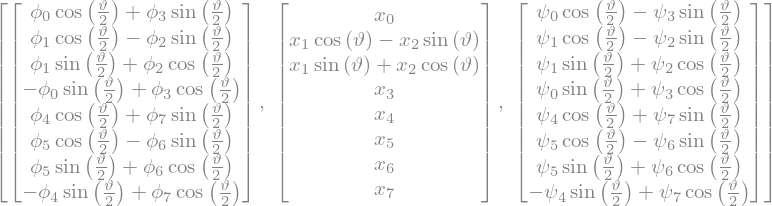

In [17]:
u, v = j1, j2
_pseudo_orthogonal_transformations(u, v)
_pseudo_orthogonal_transformations_splitOct(u, v)

<span style="color:green">

># References

> [1] Gamba, A. (1967). Peculiarities of the Eight‐Dimensional Space. Journal of Mathematical Physics, 8(4), 775-781.

> [2] Lounesto, P. (1986). Clifford algebras and spinors (pp. 25-37). Springer Netherlands.

> [3] Dray, T., & Manogue, C. A. (2015). The geometry of the octonions. World Scientific.

</span>